Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Load the dataset
df = pd.read_csv('Pima Indians Diabetes Dataset.csv')

# Inspect initial data
print("Original Dataset Info:")
df.info()

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data Cleaning (Preprocessing Part a)

In [ ]:
# 1. Handle Missing Values
# In this dataset, 0 represents missing data for specific columns
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_missing] = df[cols_missing].replace(0, np.nan)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df[cols_missing] = imputer.fit_transform(df[cols_missing])

# 2. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# 3. Correct Data Types (if necessary)
# The dataset is mostly numeric, but we ensure Outcome is int
df['Outcome'] = df['Outcome'].astype(int)

print("Data cleaning complete. Missing values imputed and duplicates removed.")

Data cleaning complete. Missing values imputed and duplicates removed.


Encoding and Feature Scaling (Preprocessing Part b & c)

In [ ]:
# Label Encoding for binary categorical features
# 'Outcome' is our binary target. It is already 0/1, but we apply LE as requested.
le = LabelEncoder()
df['Outcome'] = le.fit_transform(df['Outcome'])

# One-Hot Encoding for multi-class categorical features
# (Note: This dataset has no multi-class string features, but this is the standard code)
df = pd.get_dummies(df, drop_first=True)

# --- c. Feature Scaling ---

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("Encoding and Scaling complete.")

Encoding and Scaling complete.


Train Test Split
Split: 80%
Train: 20% Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (614, 8)
Testing shape: (154, 8)


Apply Five Machine Learning Algorithms
Model Result Analysis


--- Logistic Regression ---
Confusion Matrix:
[[82 17]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



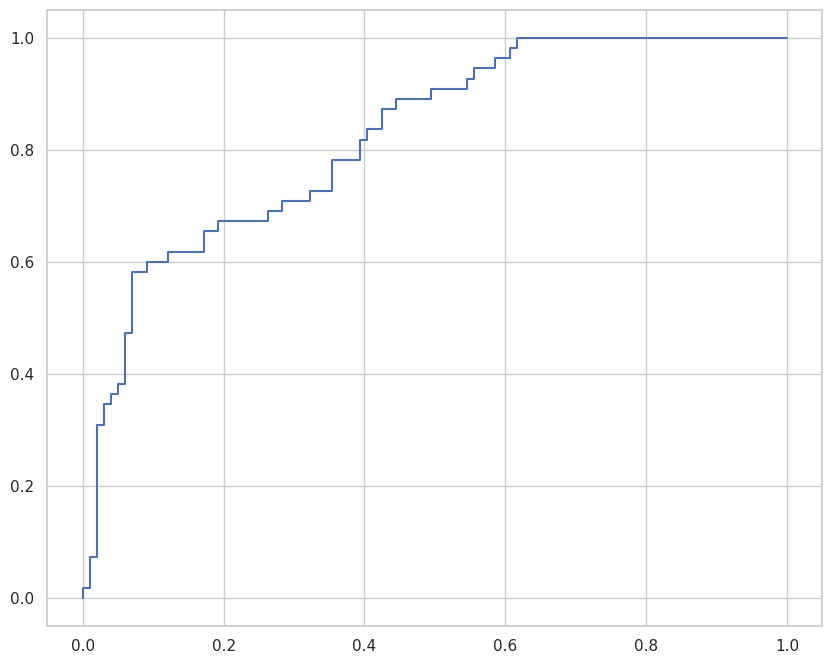

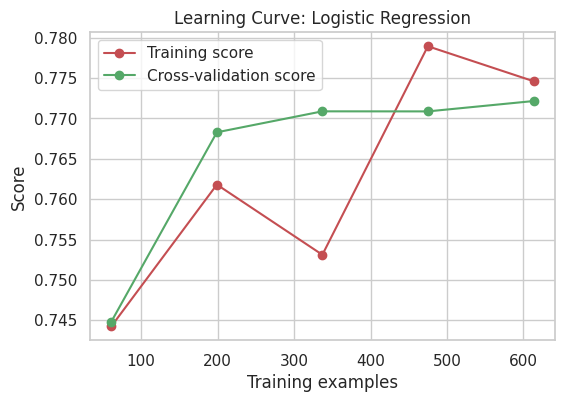

--------------------------------------------------
--- KNN ---
Confusion Matrix:
[[75 24]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



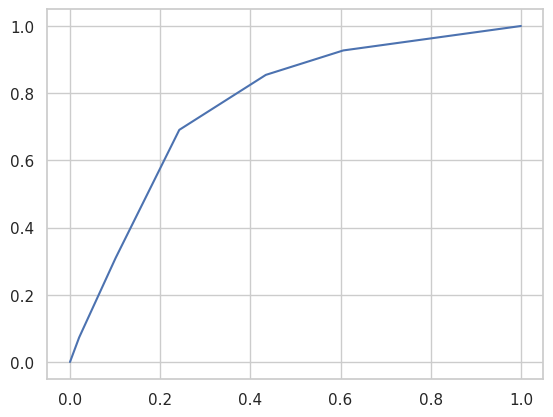

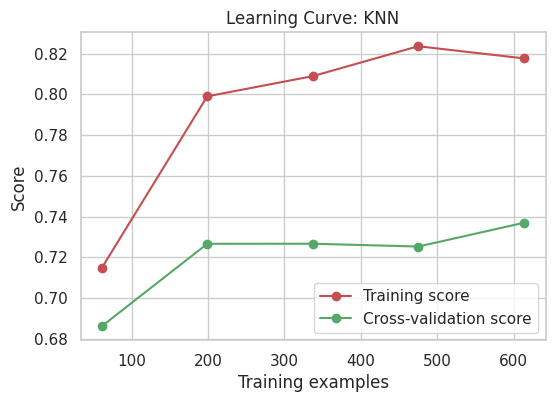

--------------------------------------------------
--- Decision Tree ---
Confusion Matrix:
[[73 26]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.62      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.70       154



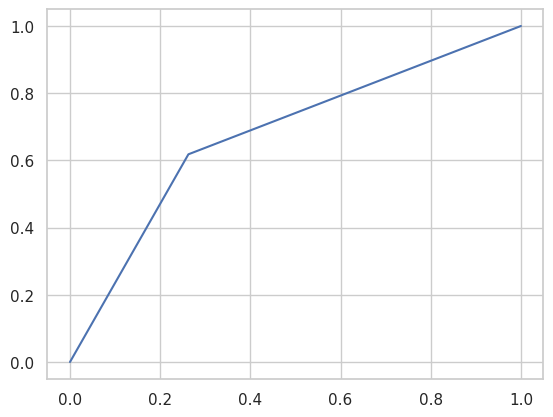

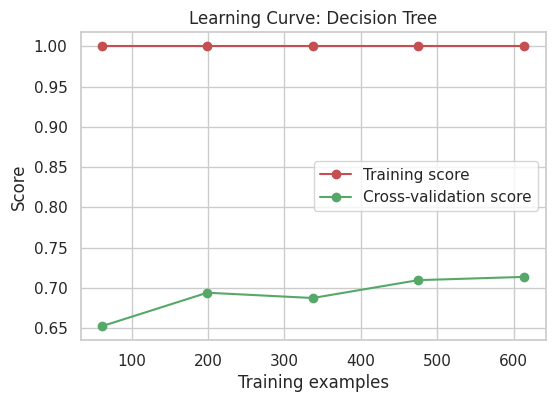

--------------------------------------------------
--- Random Forest ---
Confusion Matrix:
[[78 21]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



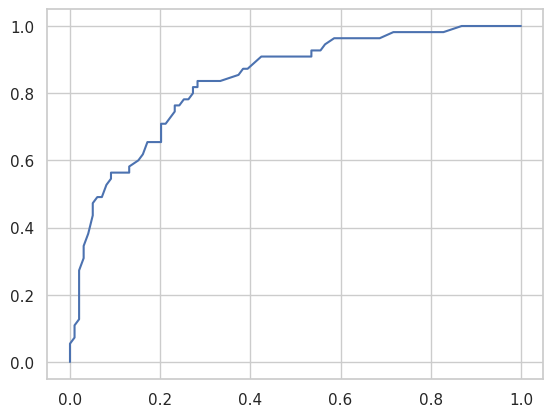

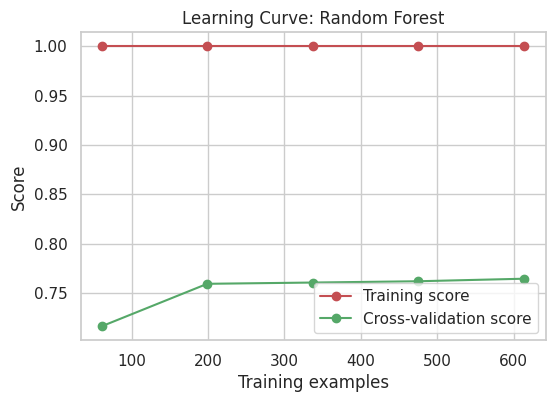

--------------------------------------------------
--- SVM ---
Confusion Matrix:
[[83 16]
 [23 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



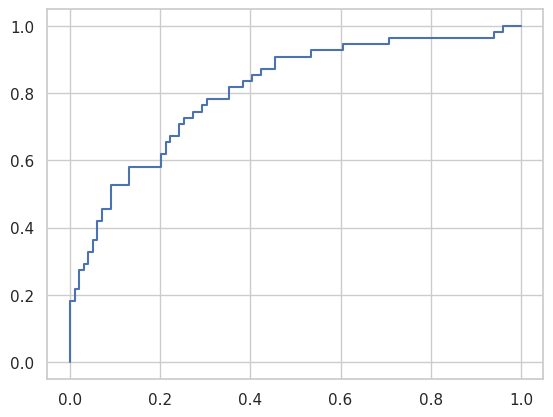

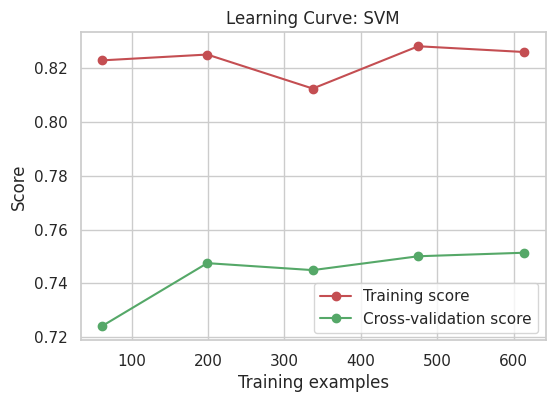

--------------------------------------------------


/tmp/ipython-input-1764973695.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


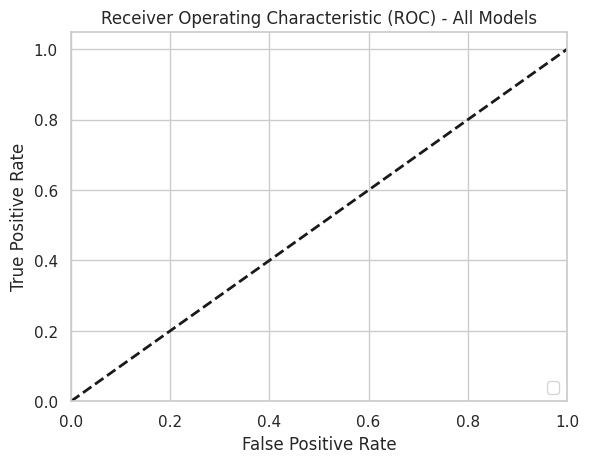

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # probability=True required for ROC curve
}

# Initialize figure for ROC Curves (We will plot all on one graph)
plt.figure(figsize=(10, 8))

# Loop through each model to train and evaluate
for name, model in models.items():
    print(f"--- {name} ---")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # 2. Precision, Recall, F1-score
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # 4. Learning Curve (Loss vs Validation Loss equivalent)
    # We use Learning Curve: Training Score vs CV Score over training sizes
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Plot Learning Curve for this model
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    print("-" * 50)

# Finalize ROC Plot
plt.figure(1) # Switch back to ROC figure
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<Figure size 1200x1000 with 0 Axes>

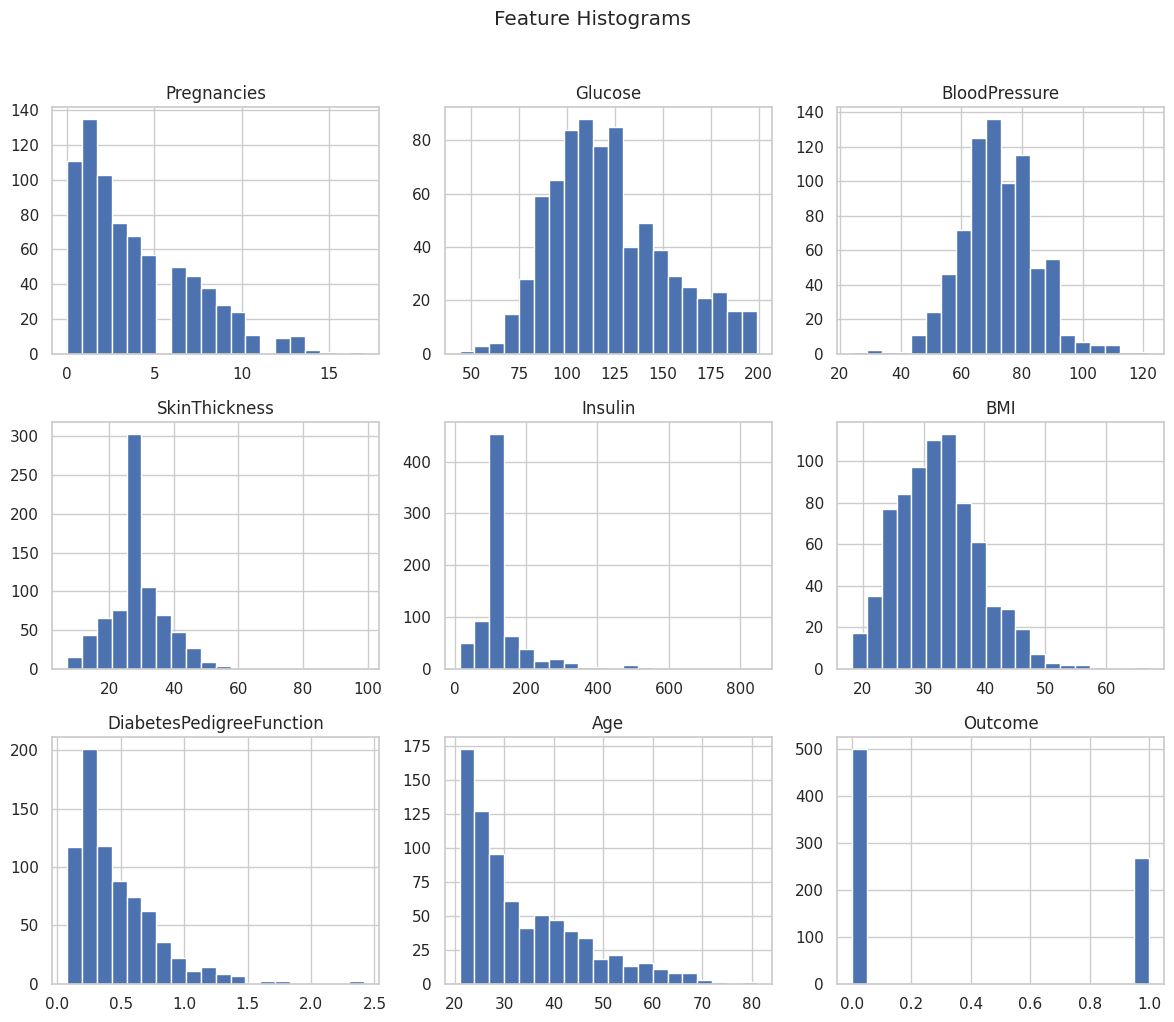

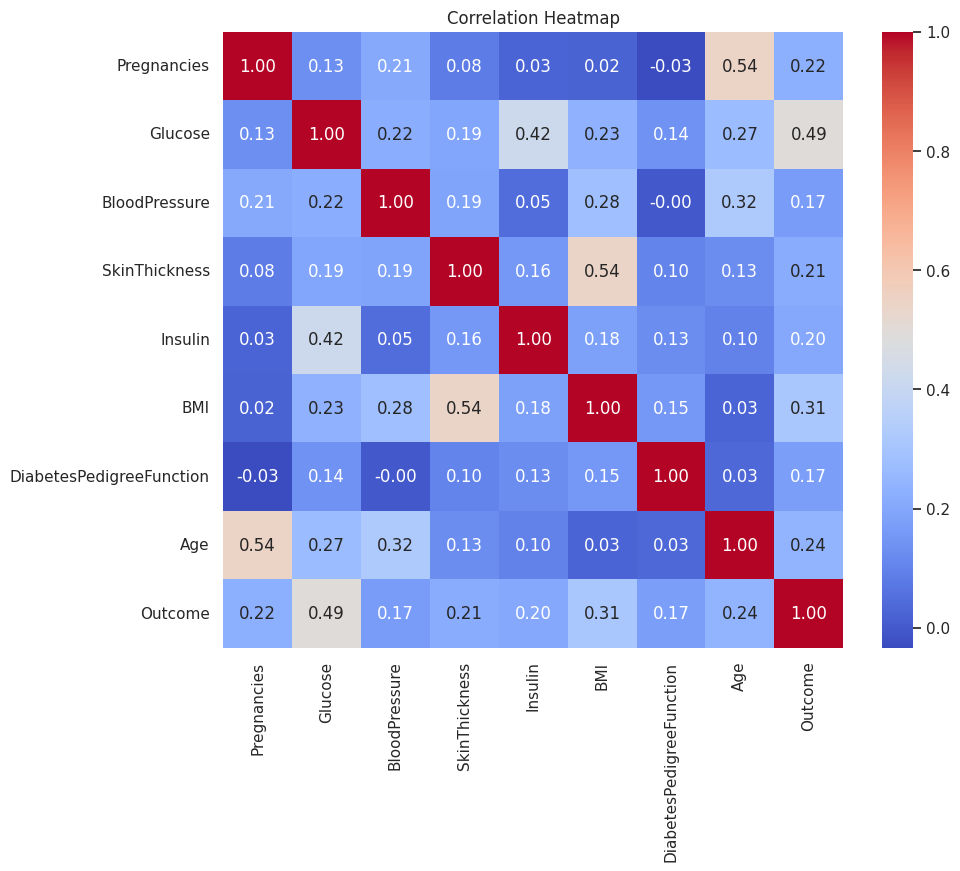

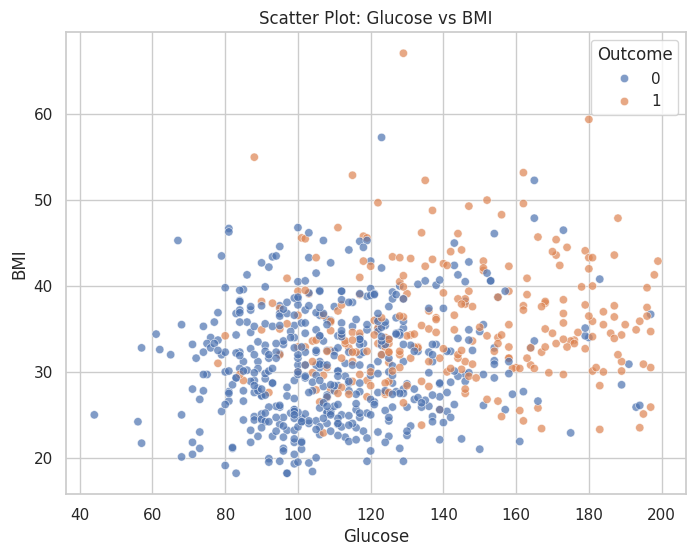

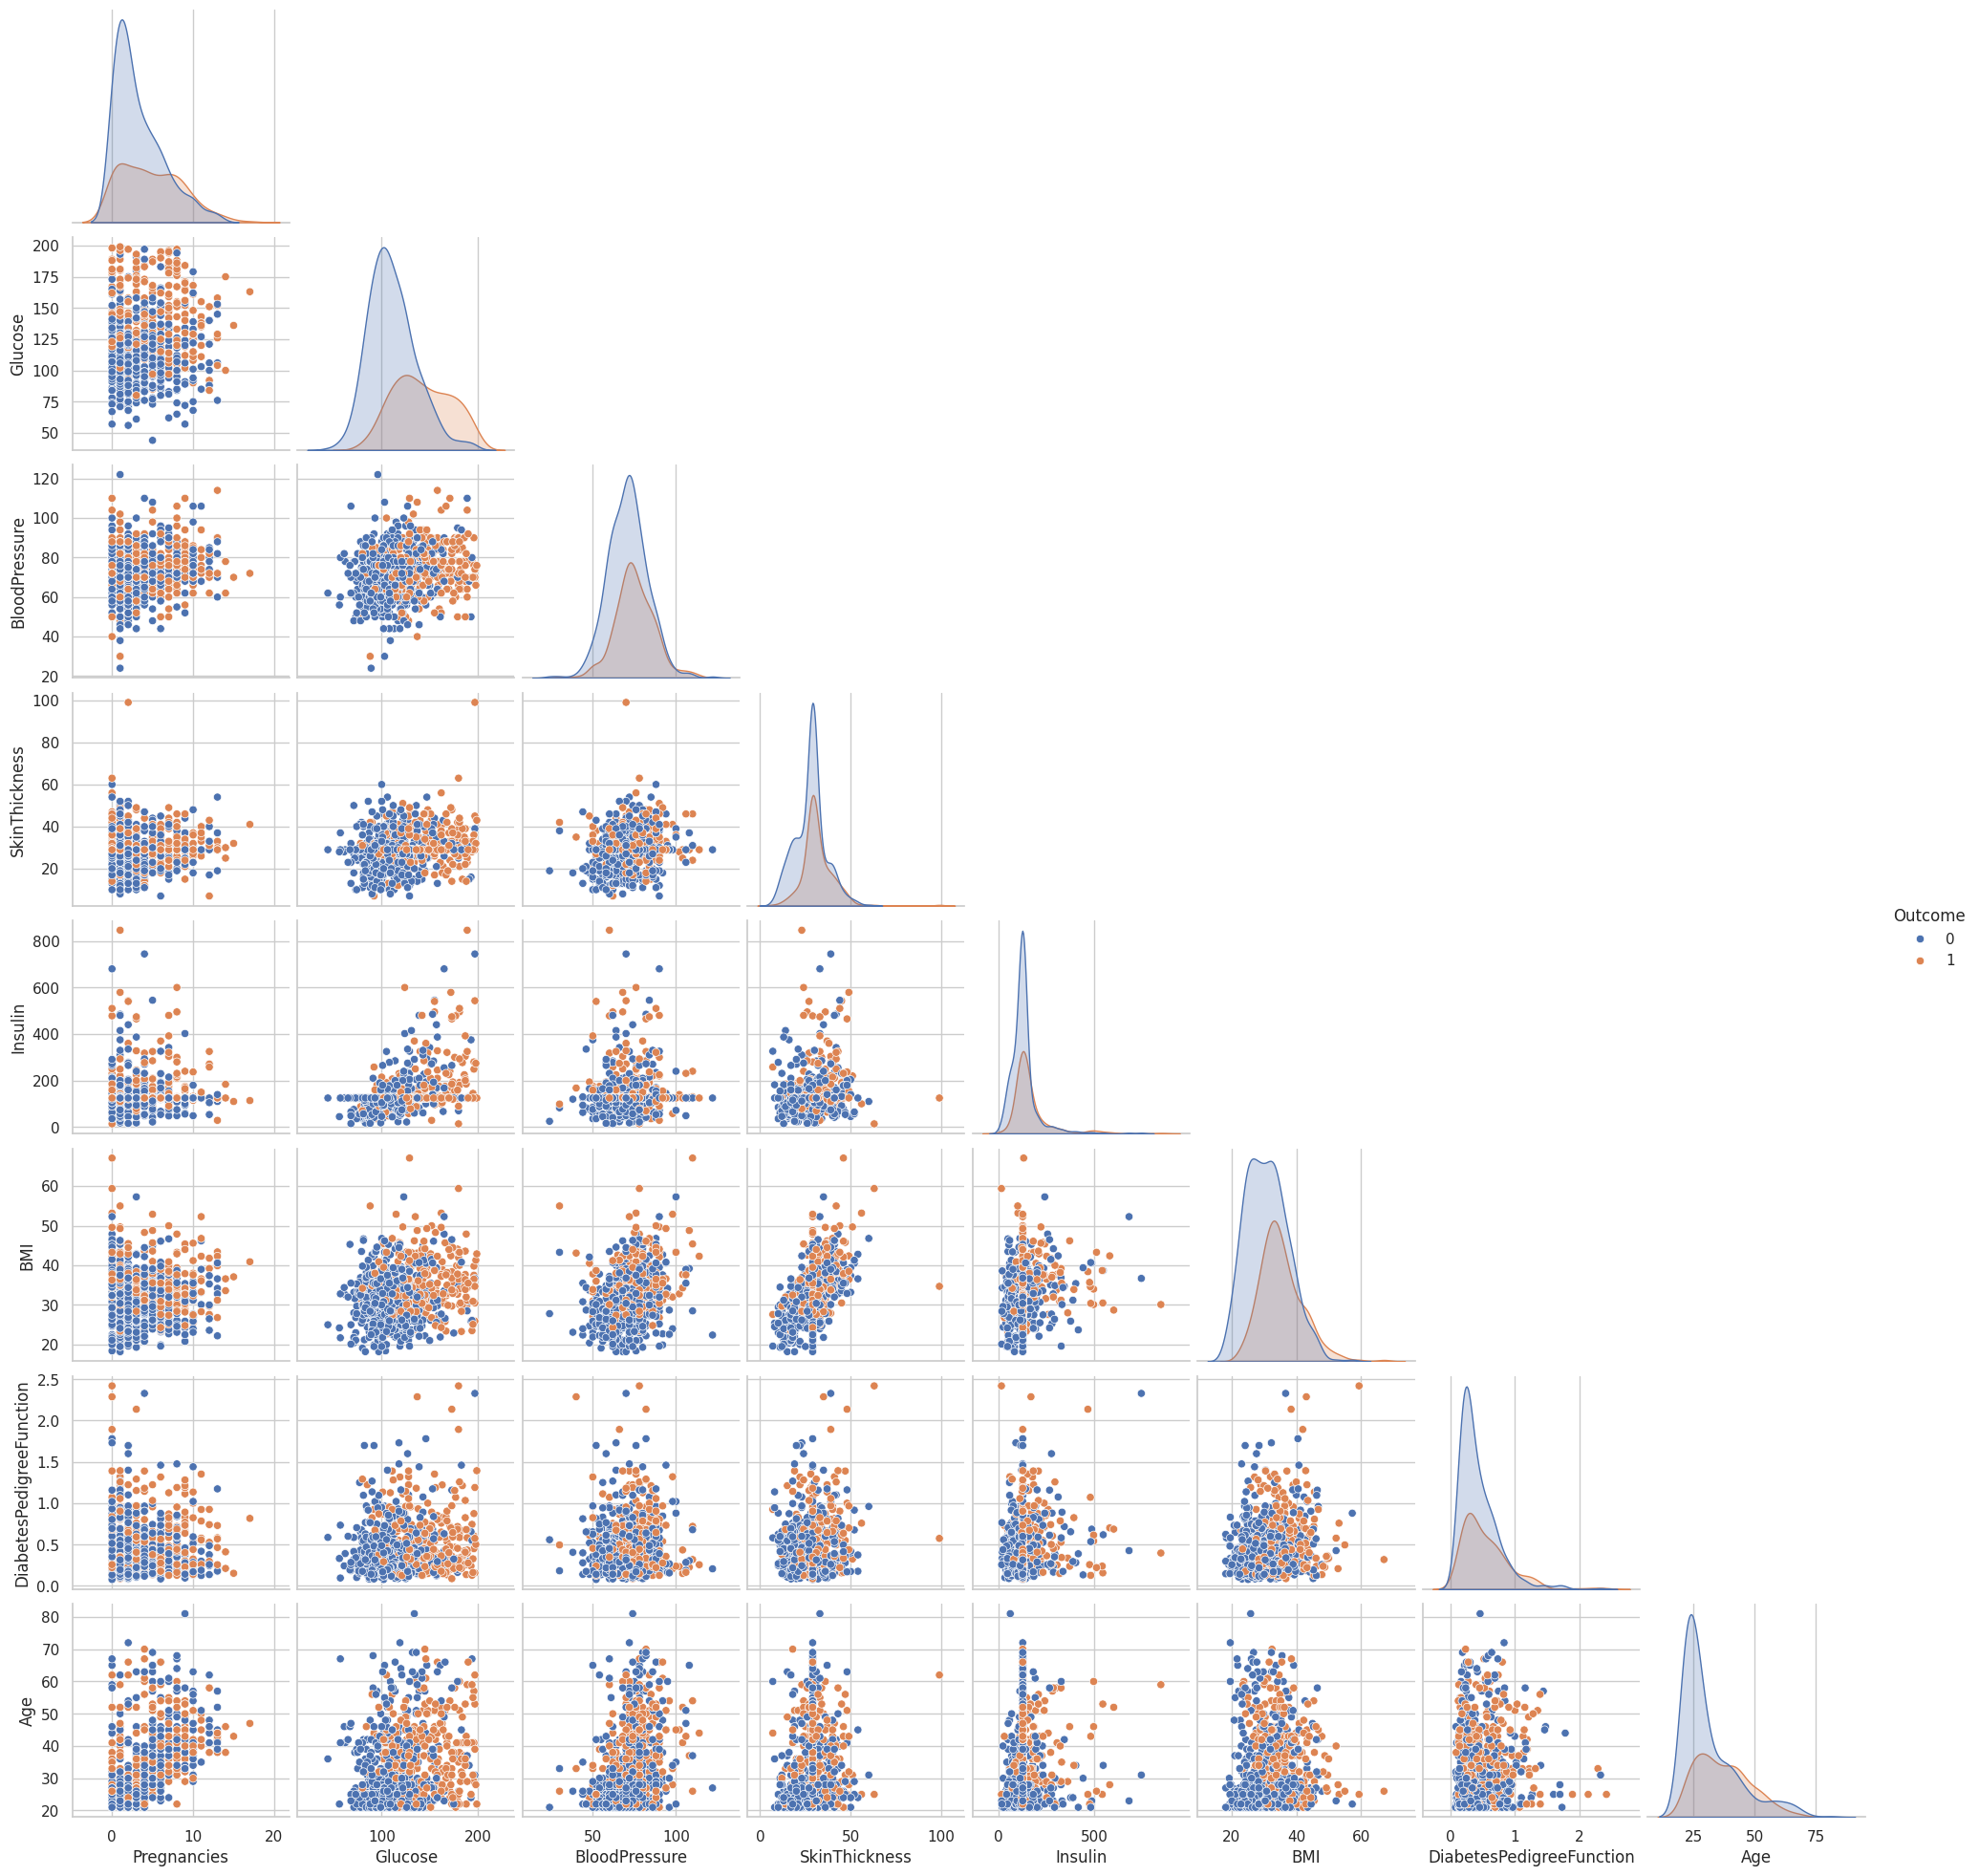

In [ ]:
# --- 6. Visualization Requirements ---

# Set style
sns.set(style="whitegrid")

# 1. Histograms (Feature Distribution)
plt.figure(figsize=(12, 10))
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Histograms", y=1.02)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Scatter Plot (Example: Glucose vs BMI)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', alpha=0.7)
plt.title("Scatter Plot: Glucose vs BMI")
plt.show()

# 4. Pairplot
sns.pairplot(df, hue='Outcome', corner=True)
plt.show()

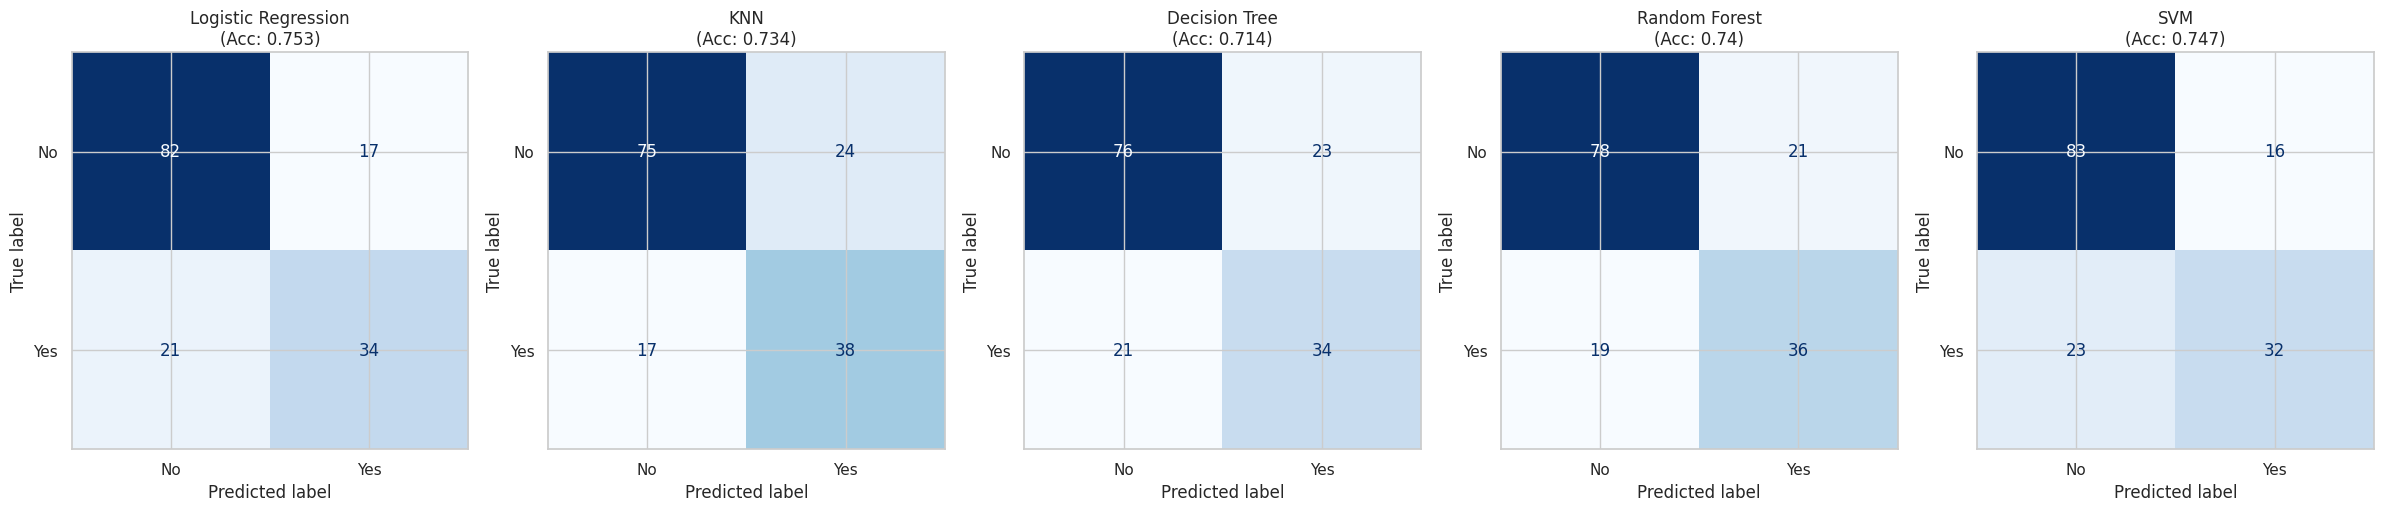

Evaluation Metrics Matrix:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.753,0.667,0.618,0.642,0.823
1,KNN,0.734,0.613,0.691,0.650,0.768
2,Decision Tree,0.714,0.596,0.618,0.607,0.693
3,Random Forest,0.740,0.632,0.655,0.643,0.833
4,SVM,0.747,0.667,0.582,0.621,0.807


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load and Preprocess Data
df = pd.read_csv('Pima Indians Diabetes Dataset.csv')

# Handle missing values
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_missing] = df[cols_missing].replace(0, np.nan)
imputer = SimpleImputer(strategy='median')
df[cols_missing] = imputer.fit_transform(df[cols_missing])
df.drop_duplicates(inplace=True)

# Split and Scale
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# 3. Generate Evaluation Matrix
metrics_list = []
fig, axes = plt.subplots(1, 5, figsize=(24, 5))

for i, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate Metrics
    metrics_list.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 3)
    })

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"{name}\n(Acc: {metrics_list[-1]['Accuracy']})")

plt.tight_layout()
plt.show()

# 4. Display Summary Table
results_df = pd.DataFrame(metrics_list)
print("Evaluation Metrics Matrix:")
display(results_df)